# Microsoft Store

Here is the data from Microsoft Store. This is my final project on the course "[Data Analysis with Python: Zero to Pandas](http://zerotopandas.com)". On this course, I've learned, how to upload dataset with Pandas and edit it, how to work with numpy library, how to analyse and visualise data using matplotlib and seaborn libraries.

In my Windows Store data are 6 columns and over 5000 rows. The whole dataset give us information about how many apps were downloaded from Microsoft Store, how many people rated this apps and what is the rating of this apps, and also which category this apps are and what is the cost of the apps.

Let's start to analyse it.

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [307]:
project_name = "Microsoft_Store_Project"

In [308]:
!pip install jovian --upgrade -q

In [309]:
import jovian

In [310]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "yernaz-togizbayev/microsoft-store-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yernaz-togizbayev/microsoft-store-project


'https://jovian.ml/yernaz-togizbayev/microsoft-store-project'

## Data Preparation and Cleaning

First of all, let's import numpy, pandas, matplotlib and seaborn libraries.

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We also include the special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself, because sometimes plots may show up in pop-up windows without this command.

So, now we can upload our data set using pandas.

In [312]:
data = pd.read_csv("msft.csv")

Using the function info() we can check, how many rows and columns in our data set are and also the name of every column.

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


As we can see, our data set contains 5321 rows and 6 columns. Let us see the content of our data.


In [314]:
data

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


As we saw above, we have 5321 rows which is non-null. But when we take a look on our data, there are altogether 5322 rows and the last one is filled with no values `NaN`, which means, it doesn't give us any information about any app in Windows Store, so we can deleate it using drop operation.

In [315]:
data = data.drop(5321)

In [316]:
data

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00


Now, we've got 5321 apps in our data set. So let's take a look on prices. As we can see, there is apps for free and also all prices in strings and in Indian rupee. To make it easier to work with Prices, we should concatinate those prices in integers. But first of all, let's find out, what is the last value of non cost app using modul display and tail.

In [317]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(data[data.Price == 'Free'].tail())

,Name,Rating,No of people Rated,Category,Date,Price
5158,Kad će Kiša,5.0,517,News and Weather,23-10-2017,Free
5159,Newseen,4.5,948,News and Weather,19-05-2013,Free
5160,Newser,3.5,502,News and Weather,06-06-2013,Free
5161,Recent Earthquakes,3.0,419,News and Weather,14-11-2012,Free
5162,Console news,5.0,655,News and Weather,10-10-2014,Free


So we see, the last row with value of price 'Free' is 5162. Let's replace 'Free' with value 0 and all prices concatinate in integers and transer in euro for more visibility (multiply by 0.0116).

In [318]:
Price_list = []
for i in data.loc[data.Price != 'Free', 'Price']:
    Price_list.append(round(float(i[2:])*0.0116, 2))   

In [319]:
data.loc[data.Price != 'Free', 'Price'] = np.array(Price_list)


In [320]:
data.loc[data.Price == 'Free', 'Price'] = 0

In [321]:
data

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,0
2,BookViewer,3.5,593,Books,29-02-2016,0
3,Brick Instructions,3.5,684,Books,30-01-2018,0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,0
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,0.63
5317,JS King,1.0,720,Developer Tools,19-07-2018,3.12
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,0.74
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,3.12


The last thing what we can do, we rename 'No of people Rated' with 'No_of_people_Rated', so it will easier to work with it.

In [322]:
data = data.rename(columns={'No of people Rated':'No_of_people_Rated'})

Now, if we go up again see information about our data, we see that only 2 of columns were detected as a numeric columns. But since we concatinated Price into integer,even though there is one more column which has numeric values. To make our analysis easier, let's convert it into numeric data types and view some basic statistics about the numeric columns.

In [323]:
data['Price'] = pd.to_numeric(data.Price, errors = 'coerce')

In [324]:
data.describe()

,Rating,No_of_people_Rated,Price
count,5321.000000,5321.000000,5321.000000
mean,3.792708,551.798722,0.127743
std,0.991681,259.787733,1.359608
min,1.000000,100.000000,0.000000
25%,3.500000,327.000000,0.000000
50%,4.000000,548.000000,0.000000
75%,4.500000,779.000000,0.000000
max,5.000000,1000.000000,63.210000


In [325]:
import jovian

In [326]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "yernaz-togizbayev/microsoft-store-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yernaz-togizbayev/microsoft-store-project


'https://jovian.ml/yernaz-togizbayev/microsoft-store-project'

## Exploratory Analysis and Visualization

Now data set is ready for analysing. Lets see, what is the most amount of downloaded apps gropping by category in this data set and plot it using barplot.

In [327]:
most_popular_category = data.Category.value_counts()
most_popular_category

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

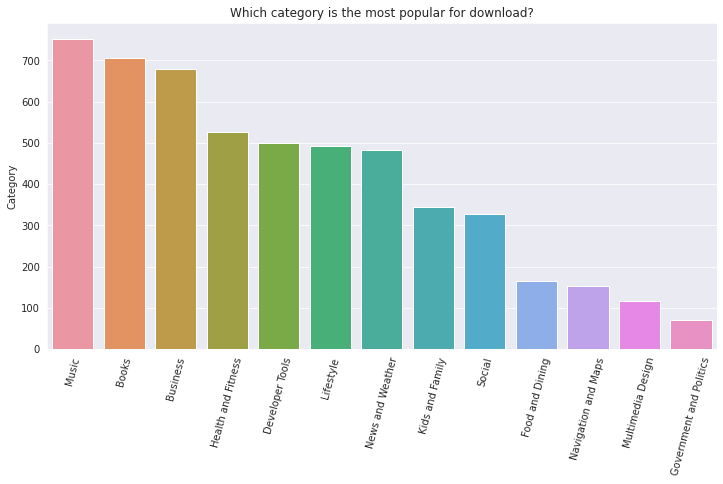

In [328]:
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
plt.title('Which category is the most popular for download?')
plt.xticks(rotation = 75)
sns.barplot(most_popular_category.index, most_popular_category);

Here we can see, that the most of apps in this data set are from category 'Music'.

In [329]:
Prices = data.groupby('Category')['Price'].sum()
Prices

Category
Books                      195.54
Business                   218.67
Developer Tools            265.51
Food and Dining              0.00
Government and Politics      0.00
Health and Fitness           0.00
Kids and Family              0.00
Lifestyle                    0.00
Multimedia Design            0.00
Music                        0.00
Navigation and Maps          0.00
News and Weather             0.00
Social                       0.00
Name: Price, dtype: float64

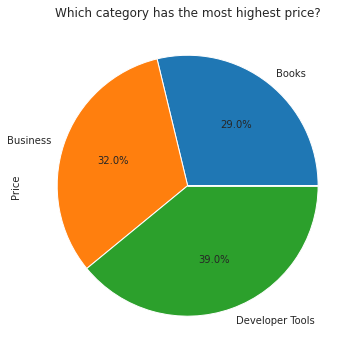

In [330]:
plt.figure(figsize=(12,6))
plt.title('Which category has the most highest price?')
Prices.plot(kind = "pie", autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else None);

Since we have only 3 categories, which has a price, we have in our pie chart Books with 29%, Business with 32% and the most expensive - Developer Tools with 39%, which is also not suprised.

Now lets find out, in which year was the most highest amount of downloads.

In [331]:
data['year'] = pd.DatetimeIndex(data.Date).year
data['month'] = pd.DatetimeIndex(data.Date).month
data['day'] = pd.DatetimeIndex(data.Date).day
data['weekday'] = pd.DatetimeIndex(data.Date).weekday

In [332]:
downloaded_apps_in_year = data.groupby('year')['No_of_people_Rated'].sum()

In [333]:
downloaded_apps_in_year

year
2010      3437
2011     19310
2012    182980
2013    296449
2014    322020
2015    324753
2016    547455
2017    433195
2018    444461
2019    259434
2020    102627
Name: No_of_people_Rated, dtype: int64

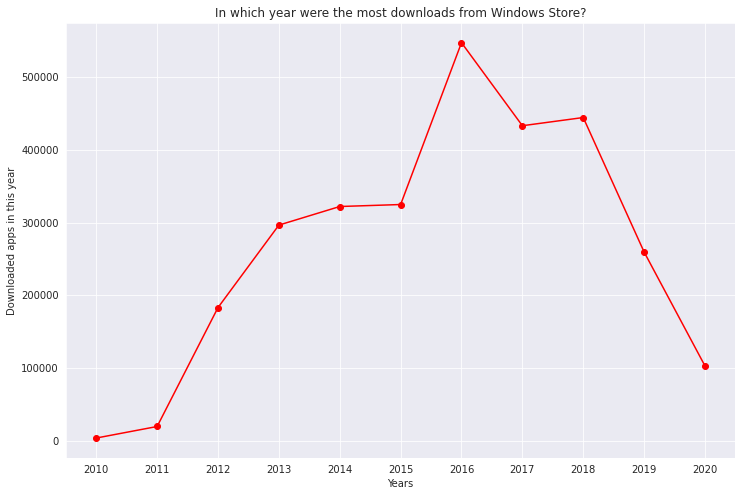

In [334]:
plt.figure(figsize=(12, 8))

plt.xlabel('Years')
plt.ylabel('Downloaded apps in this year')
plt.title("In which year were the most downloads from Windows Store?")
plt.plot(downloaded_apps_in_year.index, downloaded_apps_in_year, 'r-o');
plt.xticks(downloaded_apps_in_year.index);

Here we can see the development of downloads from Windows Store. It seems from 2010 it's getting higher and reach the pick of downloads in 2016 with over 500000 downloads, and then go down and got a little more than 100000 downloads in 2020.

And finaly, lets see, on which day people are downloading apps the most.

In [335]:
downloads_weekday = data.groupby('weekday')['No_of_people_Rated'].sum()

In [336]:
downloads_weekday

weekday
0    563905
1    473089
2    463665
3    466341
4    460497
5    287821
6    220803
Name: No_of_people_Rated, dtype: int64

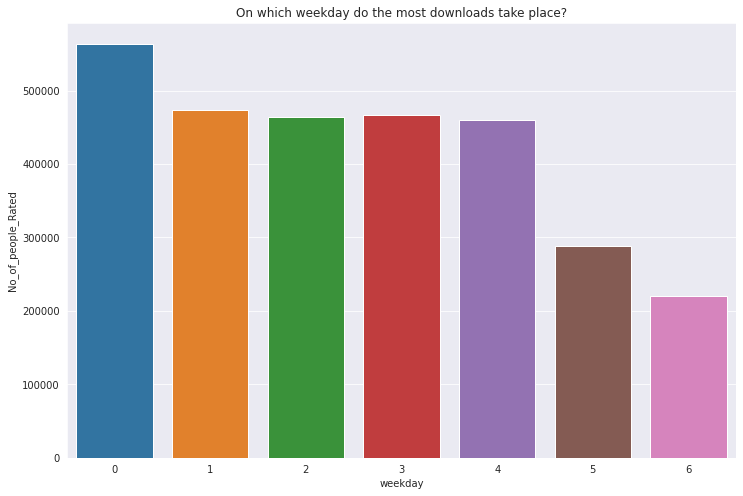

In [337]:
plt.figure(figsize = (12, 8))
plt.title("On which weekday do the most downloads take place?")
sns.barplot(downloads_weekday.index, downloads_weekday);

It seems the most popular day for apps downloading is Monday. And Tuesday, Wednesday, Thursday and Friday has almost the same amount of downloads. And looks like weekends are not the day for downloading apps. I guess, a lot of people are spending more time going outside and meeting friends or dooing any other activities and hobbies, which is pretty nice.

In [338]:
import jovian

In [339]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "yernaz-togizbayev/microsoft-store-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yernaz-togizbayev/microsoft-store-project


'https://jovian.ml/yernaz-togizbayev/microsoft-store-project'

## Asking and Answering Questions

So now, lets analyze our dataset by asking some questions.

### Q1: What is the most popular/unpopular app in the Windows Store?

If we gonna sort the data only by 'Rating', it doesn't give us an exakt answer for this qestion, because they're can be a lot of apps which were reted with 5 stars. And we sort it only by 'No_of_people_Rated', it doesn't give us an exakt answer too, because there can also a lot of apps, which were downloaded a lot of times, but rated as only 3 stars for example or even less.

So the perfect way to answer this question is sort the data both by 'Rating' and 'No_of_people_Rated'. And we don't have to forget to put 'Rating' on the first place, so it's going to be sorting at first by 'Rating' and then by 'No_of_people_Rated'.

Lets see 20 the most popular and 20 the most unpopular apps in Windows Store.

In [340]:
best_apps = data.sort_values(['Rating', 'No_of_people_Rated'], ascending = False).head(20)

In [341]:
best_apps

,Name,Rating,No_of_people_Rated,Category,Date,Price,year,month,day,weekday
1883,ILN,5.0,999,Social,05-12-2019,0.00,2019,5,12,6
319,TookBook,5.0,998,Books,26-06-2018,0.00,2018,6,26,1
3406,Contemplatio - Rosary with images,5.0,998,Lifestyle,13-08-2018,0.00,2018,8,13,0
3241,Five Good Things,5.0,996,Lifestyle,16-10-2016,0.00,2016,10,16,6
2662,Magenta Health,5.0,993,Health and Fitness,28-02-2016,0.00,2016,2,28,6
1469,BIOSToolKit,5.0,989,Developer Tools,26-07-2018,0.00,2018,7,26,3
252,Ask Sai,5.0,988,Books,17-04-2011,0.00,2011,4,17,6
2038,Parents Worship Day,5.0,988,Social,09-02-2015,0.00,2015,9,2,2
5305,Littledot,5.0,987,Developer Tools,23-03-2019,0.92,2019,3,23,5
4653,See Tow Bus,5.0,986,Navigation and Maps,25-10-2018,0.00,2018,10,25,3


In [342]:
worst_apps = best_apps = data.sort_values(['Rating', 'No_of_people_Rated'], ascending = False).tail(20)

In [343]:
worst_apps

,Name,Rating,No_of_people_Rated,Category,Date,Price,year,month,day,weekday
4444,Rennie Foster - Heart Shaped Shadow,1.0,176,Music,15-08-2013,0.00,2013,8,15,3
5249,Mirror to Samsung TV,1.0,175,Business,20-05-2020,3.12,2020,5,20,2
5267,Remote for Sonos.,1.0,170,Business,09-05-2020,3.12,2020,9,5,5
1963,ModernDeck,1.0,164,Social,09-05-2019,0.00,2019,9,5,3
4074,Transpose FREE,1.0,163,Music,01-02-2017,0.00,2017,1,2,0
495,Romeo and Juliet ebook,1.0,159,Books,25-04-2017,0.00,2017,4,25,1
783,PeoplePerHour Desktop,1.0,155,Business,21-06-2017,0.00,2017,6,21,2
5299,Offline Documentation Browser,1.0,153,Developer Tools,13-03-2020,13.33,2020,3,13,4
1717,UWP Advertising C# Sample,1.0,146,Developer Tools,27-07-2017,0.00,2017,7,27,3
1879,Social Companion,1.0,140,Social,06-09-2016,0.00,2016,6,9,3


As we can see, the most popular app is some app from social category called ILN and the worst are MapWorks Essentials and Model Railroad Manager with rating 1 star and only 108 downloads.

### Q2: Which 10 apps are the most expensive?

We have two posibilities to explore it, using only `data.sort_values` by itself and also `data.groupby` and `data.sort_value`using together. I'm going to show both of them to see the difference between these 2 methods.

As first, lets do it using `data.sort_values`. Using this method, our dataset is sorted by price, but we also can see other information about apps, like what is Rating of it, which Category is this app belong and all other columns.

In [344]:
expensive_apps = data.sort_values("Price", ascending = False).head(10)

In [345]:
expensive_apps

,Name,Rating,No_of_people_Rated,Category,Date,Price,year,month,day,weekday
5281,Pengwin Enterprise,3.0,368,Developer Tools,29-11-2018,63.21,2018,11,29,3
5202,EasyReader,4.0,990,Books,10-07-2019,30.15,2019,10,7,0
5295,RocketCake Professional,4.0,691,Developer Tools,08-12-2016,24.93,2016,8,12,4
5310,EditPlus,4.0,778,Developer Tools,27-09-2016,22.03,2016,9,27,1
5175,Oxford Dictionary of English and Thesaurus,3.0,290,Books,23-01-2015,18.84,2015,1,23,4
5255,Office Suite - Powerful editor for Adobe pdf a...,4.0,352,Business,01-12-2017,18.84,2017,1,12,3
5183,"Oxford Advanced Learner's Dictionary, 8th edition",4.0,403,Books,31-01-2013,18.84,2013,1,31,3
5259,"Grapholite - Diagrams, Flow Charts and Floor P...",4.0,287,Business,22-02-2013,17.65,2013,2,22,4
5181,Oxford Dictionary of English,4.0,391,Books,22-07-2014,15.65,2014,7,22,1
5299,Offline Documentation Browser,1.0,153,Developer Tools,13-03-2020,13.33,2020,3,13,4


Now we will use the second method. Here we can group it by every column which we want. For example for a good visibility, I'll group it by name of app and price. And here we can clearly see every price of app. And as expected, it shows 10 the most expensive apps.

In [346]:
data.groupby('Name')[['Price']].sum().sort_values(['Price'], ascending = False).head(10)

,Price
Name,
Pengwin Enterprise,63.21
EasyReader,30.15
RocketCake Professional,24.93
EditPlus,22.03
"Oxford Advanced Learner's Dictionary, 8th edition",18.84
Oxford Dictionary of English and Thesaurus,18.84
Office Suite - Powerful editor for Adobe pdf and Microsoft doc docx xls xlsx ppt pptx,18.84
"Grapholite - Diagrams, Flow Charts and Floor Plans Designer",17.65
Oxford Dictionary of English,15.65


### Q3: In which year, weekday, month and day was the most downloads in Windows Store? 

We can do it using `data.groupby` and `sort.values` again.

In [347]:
data.groupby(['year', 'weekday', 'month', 'day'])[['No_of_people_Rated']].sum().sort_values(['No_of_people_Rated'],ascending = False)

,,,,No_of_people_Rated
year,weekday,month,day,
2018,1,1,30,47300
2014,0,9,8,12703
2018,0,1,29,8936
2014,4,10,3,7073
2018,3,8,9,7018
...,...,...,...,...
2014,2,11,26,104
2018,2,8,22,103
2015,1,7,28,102


So looks like on 30th of January 2018, which is Tuesday, was happend the most downloads from Windows Store.

But lets see the downloads single in year, weekday, month and day as well.

In [348]:
data.groupby(['year'])[['No_of_people_Rated']].sum().sort_values(['No_of_people_Rated'], ascending = False)

,No_of_people_Rated
year,
2016,547455
2018,444461
2017,433195
2015,324753
2014,322020
2013,296449
2019,259434
2012,182980
2020,102627


In [349]:
data.groupby(['weekday'])[['No_of_people_Rated']].sum().sort_values(['No_of_people_Rated'], ascending = False)

,No_of_people_Rated
weekday,
0,563905
1,473089
3,466341
2,463665
4,460497
5,287821
6,220803


In [350]:
data.groupby(['month'])[['No_of_people_Rated']].sum().sort_values(['No_of_people_Rated'], ascending = False)

,No_of_people_Rated
month,
10,287169
1,284256
5,260171
8,252026
9,250583
2,246750
3,239969
7,238490
11,229105


In [351]:
data.groupby(['day'])[['No_of_people_Rated']].sum().sort_values(['No_of_people_Rated'], ascending = False)

,No_of_people_Rated
day,
30,123677
3,119978
26,111143
13,109815
19,106944
10,105823
22,105690
29,103981
24,103644


Obvious the most popular year for downloads was 2016, most popular weekday is Monday, most popular month is October and as we see, the most popular day for downloads is 30th of month.

### Q4: What is the most popular category of apps people downloading?

Lets group it by Category und summarize all number of rated people.

In [352]:
data.groupby(['Category'])[['No_of_people_Rated']].sum().sort_values(['No_of_people_Rated'], ascending = False)

,No_of_people_Rated
Category,
Music,405946
Books,387822
Business,373083
Health and Fitness,294333
Lifestyle,273025
Developer Tools,272678
News and Weather,265386
Kids and Family,190832
Social,188652


It seems people downloading a lof music from Windows Store. And if we count now how many times every category appears in our dataset, we will seeth at music is really the the most popular category which appears in our dataset 753 times.

In [353]:
data.Category.value_counts()

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

### Q5: How many people have downloaded the apps in total?
### How many people have downloaded the apps on average per day?

To answer this question, we can just use simple functions `mean` and `sum`.

In [354]:
in_total = data.No_of_people_Rated.sum()

In [355]:
in_total

2936121

In [356]:
on_average_per_day = in_total/(len(data.year.unique())*365)

In [357]:
on_average_per_day

731.2879202988792

We see, from year 2010 till today, from Windows Store it was in total more than 2.9 Million downloads, which means 731 downloads per day.

In [358]:
import jovian

In [359]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "yernaz-togizbayev/microsoft-store-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yernaz-togizbayev/microsoft-store-project


'https://jovian.ml/yernaz-togizbayev/microsoft-store-project'

## Inferences and Conclusion
In this project, we could see and analyze Windows Store from year 2010 until nowadays. So once again, let us summarize all plots together.

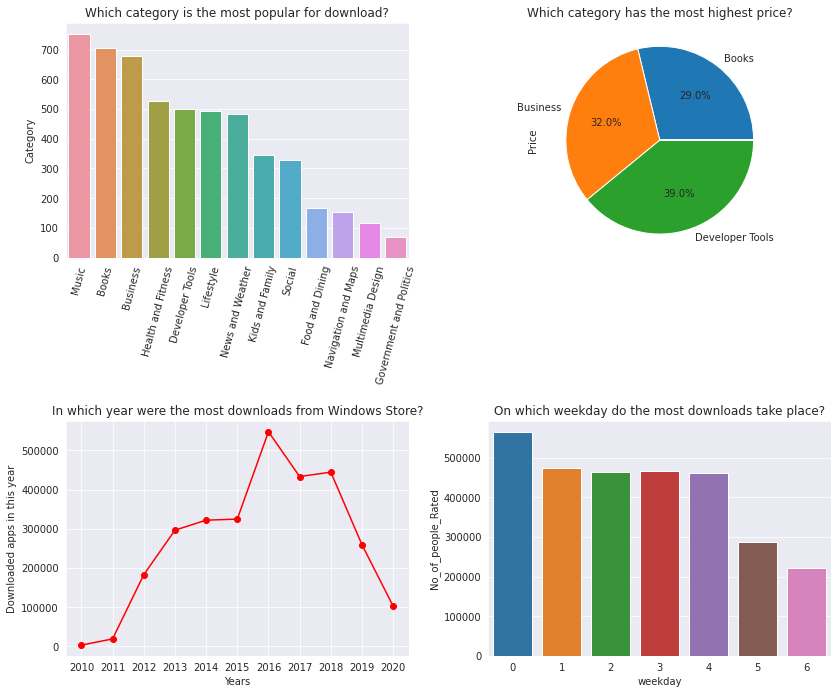

In [360]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Use the axes for plotting
axes[0,0].set_title('Which category is the most popular for download?')
sns.barplot(most_popular_category.index, most_popular_category,ax=axes[0,0]);
plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=75)

#axes[0,0].set_xticks(rotation = 75)


# Pass the axes into seaborn
axes[0,1].set_title('Which category has the most highest price?')
Prices.plot(kind = "pie", autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else None, ax=axes[0,1]);



# Use the axes for plotting
axes[1,0].set_title("In which year were the most downloads from Windows Store?")
axes[1,0].set_xlabel('Years')
axes[1,0].set_ylabel('Downloaded apps in this year')
axes[1,0].plot(downloaded_apps_in_year.index, downloaded_apps_in_year, 'r-o');
axes[1,0].set_xticks(downloaded_apps_in_year.index)



# Pass the axes into seaborn
axes[1,1].set_title("On which weekday do the most downloads take place?")
sns.barplot(downloads_weekday.index, downloads_weekday, ax=axes[1,1]);


plt.tight_layout(pad=2);

From this dataset, we could learn, what is the most downloaded category, which of category is the most expensive, in which year took place the most downloaded, and also on which weekday people prefer to download apps from Windows Store and we could see how many people are downloading apps per day.

In [361]:
import jovian

In [362]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "yernaz-togizbayev/microsoft-store-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yernaz-togizbayev/microsoft-store-project


'https://jovian.ml/yernaz-togizbayev/microsoft-store-project'

## References and Future Work

While I was working on the project, following links were very helpful. Hopefully, it helps you too.
- Lectures from course 'Data Analysis with Python: Zero to Pandas': https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
- Asking questions on the forum: https://jovian.ml/forum/c/data-analysis-with-python-zero-to-pandas/course-project/58
- Looking for answers here: https://stackoverflow.com/
- Pandas official homepage: https://pandas.pydata.org/pandas-docs/stable/reference/io.html
- Matplotlib official homepage: https://matplotlib.org/index.html

Windows Dataset were taken from [kagle](https://www.kaggle.com/).

A huge thanks to Aakash from [Jovian.ml](https://jovian.ml/) for this amazing course and giving a lot of new knowledge in data analysis, and also thanks to [FreeCodeCamp](https://www.freecodecamp.org/) for providing your online [YouTbe platform](https://www.youtube.com/freecodecamp).

In [363]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
